In [1]:
import torch
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import OPTAMI as opt
import time
import matplotlib.pyplot as plt
import math

In [2]:
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [3]:
batch_size = 4000
n_iters = 10
#epochs = n_iters / (len(train_dataset) / batch_size)
epochs = 30
input_dim = 784
output_dim = 2
lr_rate = 0.001

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [5]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs

In [6]:
model = LogisticRegression(input_dim, output_dim)
criterion = torch.nn.CrossEntropyLoss() # computes softmax and then the cross entropy
#0 is a starting point
with torch.no_grad():
    for i in range(len(list(model.parameters()))):
        list(model.parameters())[i].zero_()

In [7]:
with torch.no_grad():
    for i in range(len(list(model.parameters()))):
        list(model.parameters())[i].zero_()
        
results_hyper = [] 
gamma = 0.1
reg = False
optimizer = opt.Hyperfast(model.parameters(), L = 4.)
s1 = time.time()
#with torch.autograd.profiler.profile() as prof:
for epoch in range(int(epochs)):
    for i, (images, labels) in enumerate(train_loader):
        if i == 0:
            image = Variable(images.view(-1, 28 * 28))
            label = Variable(labels).fmod(2)
            
            def closure():
                optimizer.zero_grad()
                loss = criterion(model(image), label)
                if reg == True:
                    for i in range(len(list(model.parameters()))):
                        loss += list(model.parameters())[i].square().sum().mul(gamma)

                return loss
                
            loss = closure()
            print('loss=', loss.item())
            results_hyper.append(loss.item())
            optimizer.step(closure)
            
loss = closure()
print('loss=', loss.item())
results_hyper.append(loss.item())
s2 = time.time()
print(s2-s1)


loss= 0.693132221698761
End of line search. Total line_search calc: 1
loss= 0.4493096172809601
theta after ls 0.3125
End of line search. Total line_search calc: 5
loss= 0.3623962104320526
theta after ls 0.44140625
End of line search. Total line_search calc: 5
loss= 0.31920740008354187
theta after ls 0.51123046875
End of line search. Total line_search calc: 4
loss= 0.29482951760292053
theta after ls 0.57232666015625
End of line search. Total line_search calc: 4
loss= 0.2778145372867584
theta after ls 0.6257858276367188
End of line search. Total line_search calc: 4
loss= 0.26509711146354675
theta after ls 0.6725625991821289
End of line search. Total line_search calc: 4
loss= 0.25509530305862427
theta after ls 0.7134922742843628
End of line search. Total line_search calc: 4
loss= 0.24699106812477112
theta after ls 0.7493057399988174
End of line search. Total line_search calc: 4
loss= 0.24026978015899658
theta after ls 0.7493057399988174
End of line search. Total line_search calc: 1
loss= 

In [8]:
with torch.no_grad():
    for i in range(len(list(model.parameters()))):
        list(model.parameters())[i].zero_()
epochs_bdgm = 30    
results_bdgm = []        
gamma = 0.1
reg = False
optimizer = opt.BDGM(model.parameters(), L = 4.)
s1 = time.time()
#with torch.autograd.profiler.profile() as prof:
for epoch in range(int(epochs_bdgm)):
    for i, (images, labels) in enumerate(train_loader):
        if i == 0:
            image = Variable(images.view(-1, 28 * 28))
            label = Variable(labels).fmod(2)
            
            def closure():
                optimizer.zero_grad()
                loss = criterion(model(image), label)
                if reg == True:
                    for i in range(len(list(model.parameters()))):
                        loss += list(model.parameters())[i].square().sum().mul(gamma)

                return loss
                
            loss = closure()
            print('loss=', loss.item())
            results_bdgm.append(loss.item())
            optimizer.step(closure)
            
loss = closure()
print('loss=', loss.item())
results_bdgm.append(loss.item())
s2 = time.time()
print(s2-s1)

loss= 0.693132221698761
loss= 0.4493096172809601
loss= 0.35727572441101074
loss= 0.3189184367656708
loss= 0.2979542315006256
loss= 0.28432682156562805
loss= 0.27458834648132324
loss= 0.2670246958732605
loss= 0.26087677478790283
loss= 0.25571519136428833
loss= 0.25127771496772766
loss= 0.247395321726799
loss= 0.24395272135734558
loss= 0.2408670336008072
loss= 0.23807655274868011
loss= 0.23553623259067535
loss= 0.23320844769477844
loss= 0.23106475174427032
loss= 0.2290811389684677
loss= 0.22723782062530518
loss= 0.22551928460597992
loss= 0.22391080856323242
loss= 0.222400963306427
loss= 0.22097930312156677
loss= 0.21963845193386078
loss= 0.21836921572685242
loss= 0.2171657383441925
loss= 0.21602219343185425
loss= 0.21493373811244965
loss= 0.21389496326446533
loss= 0.2129029631614685
327.1038181781769


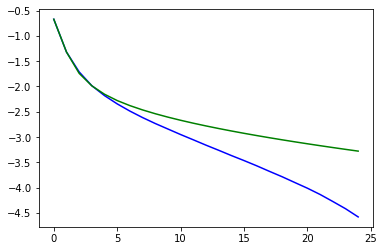

In [9]:
plt.plot(torch.tensor(results_hyper[0:25]).sub(0.182).log(), 'b')
plt.plot(torch.tensor(results_bdgm[0:25]).sub(0.182).log(), 'g')

In [10]:
with torch.no_grad():
    for i in range(len(list(model.parameters()))):
        list(model.parameters())[i].zero_()
        
results_f = []
epochs_f = 70
gamma = 0.1
reg = False
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
s1 = time.time()
#with torch.autograd.profiler.profile() as prof:
for epoch in range(int(epochs_f)):
    for i, (images, labels) in enumerate(train_loader):
        if i == 0:
            image = Variable(images.view(-1, 28 * 28))
            label = Variable(labels).fmod(2)
            
            def closure():
                optimizer.zero_grad()
                loss = criterion(model(image), label)
                if reg == True:
                    for i in range(len(list(model.parameters()))):
                        loss += list(model.parameters())[i].square().sum().mul(gamma)

                return loss
                
            loss = closure()
            loss.backward()
            print('loss=', loss.item())
            results_f.append(loss.item())
            optimizer.step()
            
loss = closure()
print('loss=', loss.item())
results_f.append(loss.item())
s2 = time.time()
print(s2-s1)

loss= 0.693132221698761
loss= 0.6214630007743835
loss= 0.5705742239952087
loss= 0.5330895781517029
loss= 0.5046017169952393
loss= 0.4823034107685089
loss= 0.4644121527671814
loss= 0.44970887899398804
loss= 0.43737688660621643
loss= 0.42684951424598694
loss= 0.41773518919944763
loss= 0.40975117683410645
loss= 0.4026886820793152
loss= 0.39638751745224
loss= 0.3907228410243988
loss= 0.3855980336666107
loss= 0.3809341490268707
loss= 0.37666839361190796
loss= 0.3727480471134186
loss= 0.3691293001174927
loss= 0.36577680706977844
loss= 0.3626595437526703
loss= 0.3597525656223297
loss= 0.3570311963558197
loss= 0.3544793426990509
loss= 0.3520795404911041
loss= 0.34981653094291687
loss= 0.347677618265152
loss= 0.34565314650535583
loss= 0.3437322676181793
loss= 0.3419077396392822
loss= 0.340170294046402
loss= 0.33851274847984314
loss= 0.336931437253952
loss= 0.3354176878929138
loss= 0.333968847990036
loss= 0.33257871866226196
loss= 0.33124515414237976
loss= 0.32996249198913574
loss= 0.32872995734

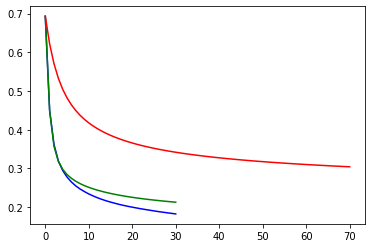

In [11]:
plt.plot(torch.tensor(results_hyper), 'b')
plt.plot(torch.tensor(results_bdgm), 'g')
plt.plot(torch.tensor(results_f), 'r')
